In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nltk # Its natural language processing toolkit

# Word Cloud
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import emoji
import re

# Matplotlib
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('text.csv')
df.head(5)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.rename(columns={'label':'category'}, inplace=True)

In [ ]:
df['category'].unique()

array([4, 0, 2, 1, 5, 3])

In [ ]:
df.isnull().sum()

,0
text,0
category,0


In [ ]:
df = df.dropna(subset=['category'])

In [ ]:
df['category'].unique()

array([4, 0, 2, 1, 5, 3])

In [ ]:
df.dtypes

,0
text,object
category,int64


In [ ]:
df['text'].duplicated().sum()

22987

In [ ]:
df['text'].drop_duplicates(inplace=True)

In [ ]:
df.shape

(416809, 2)

In [ ]:
# Lets rename the categories as {0 : 'sad', 1 : 'joy', 2 : 'love', 3 : 'anger', 4 : 'fear', 5 : 'surprize'}
df['category'] = df['category'].replace(0, 'Sadness')
df['category'] = df['category'].replace(1, 'Joy')
df['category'] = df['category'].replace(2, 'Love')
df['category'] = df['category'].replace(3, 'Anger')
df['category'] = df['category'].replace(4, 'Fear')
df['category'] = df['category'].replace(5, 'Surprise')

In [ ]:
count = df['category'].value_counts().to_frame().reset_index()

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'xy'}]],
                    subplot_titles=("Pie Chart of categories", "Bar Chart of categories"), column_widths=[0.5, 0.5], row_heights=[2])

colors = ['#a6a832','#32a0a8', '#599173', '#bfbf95', '#04bcc9', '#a14045']

# Create pie chart
pie_chart = go.Pie(labels=count['category'], values=count['count'],textinfo ='label+percent',textfont=dict(size=12, color='black'),
                                   marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.add_trace(pie_chart, row=1, col=1)

# Create bar chart
bar_chart = go.Bar(x=count['category'], y=count['count'], marker=dict(color=colors, line=dict(color='black', width=2)))

fig.add_trace(bar_chart, row=1, col=2)
fig.update_yaxes(tickfont_family="Arial Black", linecolor='black',showgrid=False)
fig.update_xaxes(tickfont_family="Arial Black", linecolor='black',showgrid=False)
fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', width=1100, height=600,
                 annotations=[dict(
            text="Pie Chart of Categories",
            x=0.2,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=18, color='black', family='Arial black')
        ),
        dict(
            text="Bar Chart of Categories",
            x=0.82,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=18, color='black', family='Arial black')
        )
    ], xaxis2=dict(showgrid=False),  # Remove x-axis grid lines for the second subplot
       yaxis2=dict(showgrid=False))  # Remove y-axis grid lines for the second subplot)


In [ ]:
# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = df[df['category']=='Sadness']
# Joy
df_joy = df[df['category']=='Joy']
# Love
df_love = df[df['category']=='Love']
# Anger
df_anger = df[df['category']=='Anger']
# Fear
df_fear = df[df['category']=='Fear']
# Surprise
df_surprise = df[df['category']=='Surprise']

In [ ]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['text'])
combined_joy_text = ' '.join(df_joy['text'])
combined_love_text = ' '.join(df_love['text'])
combined_anger_text = ' '.join(df_anger['text'])
combined_fear_text = ' '.join(df_fear['text'])
combined_surprise_text = ' '.join(df_surprise['text'])

In [ ]:
# Create word clouds
sadness_wordcloud   = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud       = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud      = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud     = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud      = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud  = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

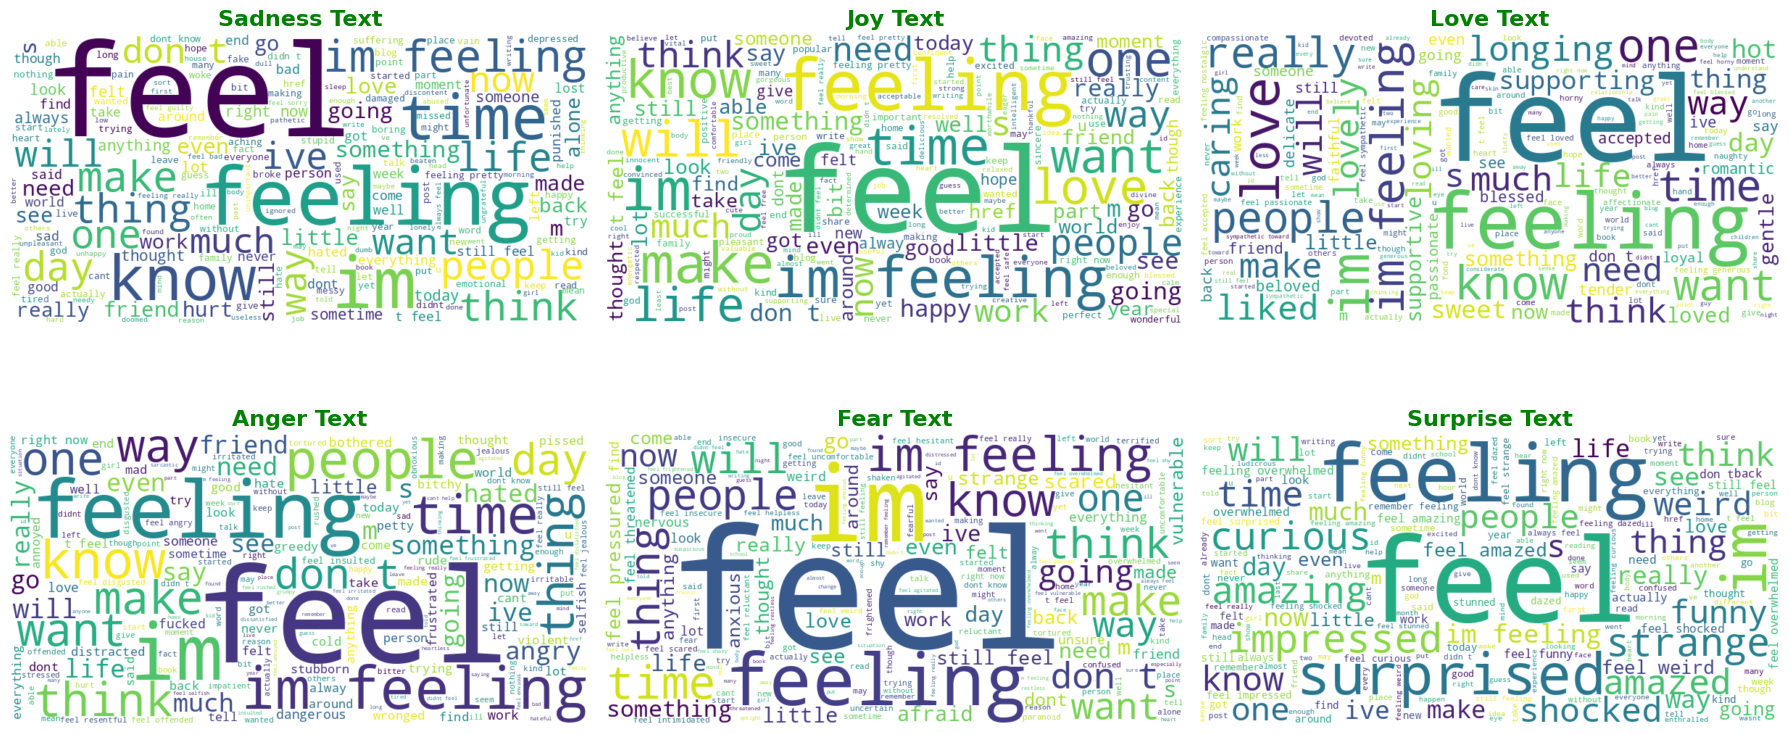

In [ ]:
# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text',fontsize=16, fontweight='bold', color='green')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [ ]:
def html_tag_remover(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df['text'] = df['text'].apply(lambda x: html_tag_remover(x))

In [ ]:
df['text'] = df['text'].str.strip()

In [ ]:
def emoji_remover(text):
    return emoji.demojize(text)

df['text'] = df['text'].apply(lambda x: emoji_remover(x))

In [ ]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[@#%&*^$£!()-_+={}\[\]:;<>,.?\/\\\'"`~]'  # Matches any character that is not alphanumeric or whitespace

    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
df['text'] = df['text'].apply(remove_special_characters)

In [ ]:
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['text'] = df['text'].apply(remove_numeric)

In [ ]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# Function to replace chat words with their full forms
def chat_conversation(text):
    words = text.split()
    for i, w in enumerate(words):
        if w.upper() in chat_words:
            words[i] = chat_words[w.upper()]
        else:
            words[i] = w
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['text'] = df['text'].apply(chat_conversation)

In [ ]:
stop_words = set(stopwords.words('english')) # gives list of stop words of English Language

def remove_stop_words(text):
    words = text.split() # Split the text by spaces
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stop_words)

In [ ]:
# Stemming is a process in natural language processing (NLP) that involves reducing words to their base or root form, known as a lemma
# Initialize the WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the text column
df['text'] = df['text'].apply(lemmatize_text)

In [ ]:
X = df['text']
y = df['category']
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Tokenize the text
max_len = max(len(tokens) for tokens in X)
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
X

array([[    2,     6,   187, ...,     0,     0,     0],
       [   22,  1049,    95, ...,     0,     0,     0],
       [  740,  5115, 35769, ...,     0,     0,     0],
       ...,
       [    2,   497,  1481, ...,     0,     0,     0],
       [    2,  4837,     1, ...,     0,     0,     0],
       [   19,   388,     9, ...,     0,     0,     0]], dtype=int32)

In [ ]:
vocab = len(tokenizer.word_index)

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (333447, 473)
X_test shape: (83362, 473)
y_train shape: (333447,)
y_test shape: (83362,)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [ ]:
# Embedding Input Size / Vocabulary Size
input_Size = vocab + 1
input_Size

67618

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=input_Size, output_dim=50, input_shape=(X.shape[1],)))

# Add Bidirectional LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64,return_sequences=True))

model.add(GlobalMaxPooling1D())

model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 473, 50)             │       3,380,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 473, 128)            │          91,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 473, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522,346 (13.44 MB)

 Trainable params: 3,522,346 (13.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
call_backs = [EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True, mode='max')]

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=1500, validation_data=(X_test,y_test), callbacks = call_backs)

Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 91s 406ms/step - accuracy: 0.9459 - loss: 0.0823 - val_accuracy: 0.9283 - val_loss: 0.1367
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 142s 406ms/step - accuracy: 0.9455 - loss: 0.0815 - val_accuracy: 0.9277 - val_loss: 0.1398
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 139s 391ms/step - accuracy: 0.9467 - loss: 0.0797 - val_accuracy: 0.9258 - val_loss: 0.1421


In [ ]:
model.save('text_sentiment_analysis.h5')